Adapted from https://github.com/estimate/pandas-exercises

In [1]:
from pandas import *
options.display.max_rows = 25
import pandas
from matplotlib import pyplot as plt
pandas.__version__

u'0.18.1'

In [2]:
names = read_csv('baby-names2.csv')

In [3]:
names

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


In [4]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [5]:
names[names.year == 1880].head()    

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [6]:
names[names.year == 1880].tail()

,year,name,prop,sex,soundex
129995,1880,Emaline,0.000041,girl,E545
129996,1880,Ester,0.000041,girl,E236
129997,1880,Eulah,0.000041,girl,E400
129998,1880,Eulalie,0.000041,girl,E440
129999,1880,Euna,0.000041,girl,E500


In [7]:
boys = names[names.sex == 'boy']    # segment the data into boy and girl names. We have 2 dataframes now.
girls = names[names.sex == 'girl']

In [8]:
boys.groupby('year')
boys[boys.year > 2000].sort('prop', ascending=False)

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,year,name,prop,sex,soundex
121000,2001,Jacob,0.015734,boy,J210
122000,2002,Jacob,0.014792,boy,J210
121001,2001,Michael,0.014357,boy,M240
123000,2003,Jacob,0.014104,boy,J210
122001,2002,Michael,0.013669,boy,M240
124000,2004,Jacob,0.013196,boy,J210
121002,2001,Matthew,0.012965,boy,M300
123001,2003,Michael,0.012906,boy,M240
121003,2001,Joshua,0.012582,boy,J200
122002,2002,Joshua,0.012581,boy,J200


In [9]:
boys.groupby('year').size()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
1885    1000
1886    1000
1887    1000
1888    1000
1889    1000
1890    1000
1891    1000
        ... 
1997    1000
1998    1000
1999    1000
2000    1000
2001    1000
2002    1000
2003    1000
2004    1000
2005    1000
2006    1000
2007    1000
2008    1000
dtype: int64

In [10]:
names.groupby(['year', 'sex']).size()

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
      girl    1000
1883  boy     1000
      girl    1000
1884  boy     1000
      girl    1000
1885  boy     1000
      girl    1000
              ... 
2003  boy     1000
      girl    1000
2004  boy     1000
      girl    1000
2005  boy     1000
      girl    1000
2006  boy     1000
      girl    1000
2007  boy     1000
      girl    1000
2008  boy     1000
      girl    1000
dtype: int64

In [11]:
type(names.groupby(['year', 'sex']).size())

pandas.core.series.Series

In [12]:
names.groupby(['year', 'sex']).size().ix[2000]    # select out by year: 2001, 2002. Only show the inner key.

sex
boy     1000
girl    1000
dtype: int64

In [13]:
boys[boys.year == 2000]   # We would like to find out most popular boy names for each year.

,year,name,prop,sex,soundex
120000,2000,Jacob,0.016514,boy,J210
120001,2000,Michael,0.015346,boy,M240
120002,2000,Matthew,0.013695,boy,M300
120003,2000,Joshua,0.013194,boy,J200
120004,2000,Christopher,0.011990,boy,C623
120005,2000,Nicholas,0.011815,boy,N242
120006,2000,Andrew,0.011324,boy,A536
120007,2000,Joseph,0.010930,boy,J210
120008,2000,Daniel,0.010681,boy,D540
120009,2000,Tyler,0.010305,boy,T460


In [14]:
boys[boys.year == 2000].prop

120000    0.016514
120001    0.015346
120002    0.013695
120003    0.013194
120004    0.011990
120005    0.011815
120006    0.011324
120007    0.010930
120008    0.010681
120009    0.010305
120010    0.009896
120011    0.009745
            ...   
120988    0.000072
120989    0.000071
120990    0.000071
120991    0.000071
120992    0.000071
120993    0.000071
120994    0.000071
120995    0.000071
120996    0.000071
120997    0.000071
120998    0.000071
120999    0.000071
Name: prop, dtype: float64

In [15]:
boys[boys.year == 2000][:5]

,year,name,prop,sex,soundex
120000,2000,Jacob,0.016514,boy,J210
120001,2000,Michael,0.015346,boy,M240
120002,2000,Matthew,0.013695,boy,M300
120003,2000,Joshua,0.013194,boy,J200
120004,2000,Christopher,0.011990,boy,C623


In [16]:
boys[boys.year == 2000].prop.idxmax()

120000

In [17]:
boys.ix[boys[boys.year == 2000].prop.idxmax()]  # to get the whole row.

year           2000
name          Jacob
prop       0.016514
sex             boy
soundex        J210
Name: 120000, dtype: object

In [18]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

get_max_record(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [19]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

result = boys.groupby('year').apply(get_max_record)

In [20]:
result   # the popularity of a certain name goes down over time.

,year,name,prop,sex,soundex
year,,,,,
1880,1880,John,0.081541,boy,J500
1881,1881,John,0.080975,boy,J500
1882,1882,John,0.078314,boy,J500
1883,1883,John,0.079066,boy,J500
1884,1884,John,0.076476,boy,J500
1885,1885,John,0.075517,boy,J500
1886,1886,John,0.075820,boy,J500
1887,1887,John,0.074181,boy,J500
1888,1888,John,0.071186,boy,J500


In [21]:
result.prop.plot()

In [22]:
boys[boys.name == 'Travis']

,year,name,prop,sex,soundex
563,1880,Travis,0.000101,boy,T612
2648,1882,Travis,0.000082,boy,T612
3672,1883,Travis,0.000080,boy,T612
4656,1884,Travis,0.000081,boy,T612
5602,1885,Travis,0.000095,boy,T612
6598,1886,Travis,0.000092,boy,T612
9871,1889,Travis,0.000059,boy,T612
10733,1890,Travis,0.000075,boy,T612
11696,1891,Travis,0.000082,boy,T612
12593,1892,Travis,0.000099,boy,T612


In [23]:
idf = boys.set_index(['name', 'year'])   # pull out the indexes, and move them to the row.

In [24]:
idf[-50:]

,,prop,sex,soundex
name,year,,,
Reilly,2008,0.000097,boy,R400
Sheldon,2008,0.000097,boy,S435
Abdullah,2008,0.000097,boy,A134
Jagger,2008,0.000097,boy,J260
Thaddeus,2008,0.000097,boy,T320
Case,2008,0.000096,boy,C200
Kyson,2008,0.000096,boy,K250
Lamont,2008,0.000096,boy,L553
Chaz,2008,0.000096,boy,C200


In [25]:
idf.ix['Travis']

,prop,sex,soundex
year,,,
1880,0.000101,boy,T612
1882,0.000082,boy,T612
1883,0.000080,boy,T612
1884,0.000081,boy,T612
1885,0.000095,boy,T612
1886,0.000092,boy,T612
1889,0.000059,boy,T612
1890,0.000075,boy,T612
1891,0.000082,boy,T612


In [26]:
idf.ix['Travis'].prop.plot()

In [27]:
boys.groupby('name')['prop'].mean()

name
Aaden        0.000442
Aarav        0.000101
Aaron        0.002266
Ab           0.000044
Abb          0.000046
Abbie        0.000046
Abbott       0.000044
Abdiel       0.000092
Abdul        0.000064
Abdullah     0.000094
Abe          0.000225
Abel         0.000152
               ...   
Zayden       0.000185
Zayne        0.000091
Zeb          0.000080
Zebulon      0.000055
Zechariah    0.000112
Zed          0.000056
Zeke         0.000055
Zenas        0.000052
Zeno         0.000071
Zigmund      0.000052
Zion         0.000490
Zollie       0.000060
Name: prop, dtype: float64

In [28]:
boys.groupby('name')['prop'].mean().order()

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


name
Kennard     0.000027
Danniel     0.000027
Deryl       0.000028
Grayling    0.000028
Michial     0.000028
Cheryl      0.000028
Dwyane      0.000028
Levern      0.000029
Theodis     0.000029
Randolf     0.000029
Diane       0.000029
Renard      0.000029
              ...   
Edward      0.011069
Richard     0.014183
Thomas      0.014739
George      0.016254
David       0.016737
Joseph      0.017771
Michael     0.018342
Charles     0.019521
Robert      0.029625
William     0.034182
James       0.035465
John        0.041082
Name: prop, dtype: float64

In [29]:
boys['prop'].describe()   # Getting the summary of statistics from the dataframe, based on proportion.e

count    129000.000000
mean          0.000916
std           0.003441
min           0.000026
25%           0.000071
50%           0.000142
75%           0.000453
max           0.081541
Name: prop, dtype: float64

In [30]:
result = boys.groupby('year')['prop'].describe()

In [31]:
result[:50]

year       
1880  count    1000.000000
      mean        0.000931
      std         0.004871
      min         0.000042
      25%         0.000059
      50%         0.000118
      75%         0.000372
      max         0.081541
1881  count    1000.000000
      mean        0.000930
      std         0.004812
      min         0.000037
                  ...     
1884  75%         0.000385
      max         0.076476
1885  count    1000.000000
      mean        0.000926
      std         0.004459
      min         0.000043
      25%         0.000069
      50%         0.000121
      75%         0.000373
      max         0.075517
1886  count    1000.000000
      mean        0.000926
Name: prop, dtype: float64

In [32]:
df = boys[boys.year == 2008]

In [33]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
128005    0.008566
128006    0.008442
128007    0.008438
128008    0.008268
128009    0.008061
128010    0.007877
128011    0.007694
            ...   
128988    0.000091
128989    0.000091
128990    0.000090
128991    0.000090
128992    0.000090
128993    0.000090
128994    0.000090
128995    0.000090
128996    0.000089
128997    0.000089
128998    0.000089
128999    0.000089
Name: prop, dtype: float64

In [34]:
df = boys[boys.year == 2008].sort_index(by='prop', ascending=False)   # If not in descending order. Can also do ascending=True for ascending.

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [35]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
128005    0.008566
128006    0.008442
128007    0.008438
128008    0.008268
128009    0.008061
128010    0.007877
128011    0.007694
            ...   
128986    0.000091
128987    0.000091
128990    0.000090
128991    0.000090
128992    0.000090
128993    0.000090
128994    0.000090
128995    0.000090
128996    0.000089
128997    0.000089
128998    0.000089
128999    0.000089
Name: prop, dtype: float64

In [36]:
df.prop.cumsum()   # numpy

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
128005    0.055160
128006    0.063602
128007    0.072040
128008    0.080308
128009    0.088369
128010    0.096246
128011    0.103940
            ...   
128986    0.794427
128987    0.794518
128990    0.794608
128991    0.794698
128992    0.794788
128993    0.794878
128994    0.794968
128995    0.795058
128996    0.795147
128997    0.795236
128998    0.795325
128999    0.795414
Name: prop, dtype: float64

In [37]:
df.prop.cumsum().searchsorted(0.5)   # how many does it take to reach 50%. Also called a measure of diversity.

array([127])

In [38]:
df.prop.cumsum()[:130]

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
128005    0.055160
128006    0.063602
128007    0.072040
128008    0.080308
128009    0.088369
128010    0.096246
128011    0.103940
            ...   
128118    0.486563
128119    0.488203
128120    0.489818
128121    0.491429
128122    0.493032
128123    0.494626
128124    0.496173
128125    0.497718
128126    0.499243
128127    0.500748
128128    0.502243
128129    0.503723
Name: prop, dtype: float64

In [39]:
def get_quantile_count(group, quantile = 0.5):
    df = group.sort_index(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)

boys.groupby('year').apply(get_quantile_count).plot()

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


TypeError: Empty 'DataFrame': no numeric data to plot

In [41]:
def get_quantile_count(group, quantile=0.5):     # Problem with no different colors for boys and girls.
    group = group.groupby('soundex').sum()
    df = group.sort_index(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)

#f = lambda x: get_quantile_count(x, 0.1)
q = 0.25
boy_ct = boys.groupby('year').apply(get_quantile_count, quantile=q)   # to pass different values for quantile
girl_ct = girls.groupby('year').apply(get_quantile_count, quantile=q)
boy_ct.plot(label='boy')
girl_ct.plot(label='girl')
legend(loc='best')    # with --pylab=inline, we don't have to do plt.legend()

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


TypeError: Empty 'DataFrame': no numeric data to plot

In [42]:
boys[boys.year == 2008].prop.rank()    # mean rank by default.

128000    1000.0
128001     999.0
128002     998.0
128003     997.0
128004     996.0
128005     995.0
128006     994.0
128007     993.0
128008     992.0
128009     991.0
128010     990.0
128011     989.0
           ...  
128988      12.5
128989      12.5
128990       7.5
128991       7.5
128992       7.5
128993       7.5
128994       7.5
128995       7.5
128996       2.5
128997       2.5
128998       2.5
128999       2.5
Name: prop, dtype: float64

In [43]:
grouped = boys.groupby('year')['prop']

In [44]:
grouped.transform(Series.rank)   # transform is more rigid than apply. Output the same size as the input.

0         1000.0
1          999.0
2          998.0
3          997.0
4          996.0
5          995.0
6          994.0
7          993.0
8          992.0
9          991.0
10         990.0
11         989.0
           ...  
128988      12.5
128989      12.5
128990       7.5
128991       7.5
128992       7.5
128993       7.5
128994       7.5
128995       7.5
128996       2.5
128997       2.5
128998       2.5
128999       2.5
Name: prop, dtype: float64

In [45]:
boys['year_rank'] = grouped.transform(Series.rank)

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
boys[boys.name == 'Wesley'].year_rank.plot()

In [47]:
idf = boys.set_index(['name', 'year'])   # same as above
idf.ix['Wesley']
idf.ix['Wesley'].year_rank
idf.ix['Wesley'].year_rank.plot()

In [48]:
% timeit result = grouped.transform(lambda x: x - x.mean())

10 loops, best of 3: 46.6 ms per loop


In [49]:
% timeit result = grouped.apply(lambda x: x - x.mean())

10 loops, best of 3: 40.7 ms per loop


In [50]:
names   # Output only the proportion of each name, not the amount.

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


In [51]:
births = read_csv('births.csv')

In [52]:
merged = merge(names, births, on=['year', 'sex'])   # merge 2 tables: names and births.

In [53]:
merge(names, births)   # same as above. Join is performed using the common columns: year and sex
                       # Many to many joins in SQL compute the cartesians products of duplicated keys.

,year,name,prop,sex,soundex,births
0,1880,John,0.081541,boy,J500,118405
1,1880,William,0.080511,boy,W450,118405
2,1880,James,0.050057,boy,J520,118405
3,1880,Charles,0.045167,boy,C642,118405
4,1880,George,0.043292,boy,G620,118405
5,1880,Frank,0.027380,boy,F652,118405
6,1880,Joseph,0.022229,boy,J210,118405
7,1880,Thomas,0.021401,boy,T520,118405
8,1880,Henry,0.020641,boy,H560,118405
9,1880,Robert,0.020404,boy,R163,118405


In [54]:
merged['persons'] = np.floor(merged.prop * merged.births)

In [55]:
merged.head()

,year,name,prop,sex,soundex,births,persons
0,1880,John,0.081541,boy,J500,118405,9654.0
1,1880,William,0.080511,boy,W450,118405,9532.0
2,1880,James,0.050057,boy,J520,118405,5926.0
3,1880,Charles,0.045167,boy,C642,118405,5347.0
4,1880,George,0.043292,boy,G620,118405,5125.0


In [56]:
merged.groupby(['name', 'sex'])['persons'].sum()   # slice and dice. It's a hierarhical labeling.

name      sex 
Aaden     boy        959.0
Aaliyah   girl     39660.0
Aarav     boy        219.0
Aaron     boy     508034.0
          girl      1365.0
Ab        boy         24.0
Abagail   girl      2680.0
Abb       boy         15.0
Abbey     girl     14333.0
Abbie     boy         10.0
          girl     16556.0
Abbigail  girl      6792.0
                    ...   
Zion      boy      11428.0
          girl      1530.0
Zita      girl       831.0
Zoa       girl        73.0
Zoe       girl     66271.0
Zoey      girl     19335.0
Zoie      girl      4688.0
Zola      girl      4847.0
Zollie    boy         60.0
Zona      girl      3218.0
Zora      girl      4551.0
Zula      girl      3578.0
Name: persons, dtype: float64

In [57]:
merged.groupby(['name', 'sex'])['persons'].sum().order()

/home/vagrant/miniconda2/envs/jupyterlab/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


name         sex 
Alabama      girl          3.0
Daisye       girl          3.0
Crissie      girl          3.0
Dollye       girl          3.0
Dema         girl          3.0
Chestina     girl          3.0
Ala          girl          3.0
Clem         girl          3.0
Chester      girl          3.0
Eithel       girl          3.0
Amey         girl          3.0
Achsah       girl          3.0
                       ...    
Christopher  boy     1924919.0
Thomas       boy     2239606.0
Charles      boy     2320818.0
Joseph       boy     2490274.0
Richard      boy     2535681.0
David        boy     3495940.0
William      boy     3951365.0
Mary         girl    4097626.0
Michael      boy     4207352.0
Robert       boy     4752198.0
John         boy     5016124.0
James        boy     5021269.0
Name: persons, dtype: float64

In [58]:
mboys = merge(boys, births)  # inner join by default.

In [59]:
mboys['persons'] = np.floor(mboys.prop * mboys.births)

In [60]:
persons = mboys.set_index(['year', 'name']).persons   # Select out persons

In [61]:
type(persons)  # One dimensional series.


pandas.core.series.Series

In [62]:
persons  # hierarhical index

year  name    
1880  John        9654.0
      William     9532.0
      James       5926.0
      Charles     5347.0
      George      5125.0
      Frank       3241.0
      Joseph      2632.0
      Thomas      2533.0
      Henry       2443.0
      Robert      2415.0
      Edward      2363.0
      Harry       2152.0
                   ...  
2008  Pierre       197.0
      Cortez       197.0
      Baron        195.0
      Carlo        195.0
      Carsen       195.0
      Fletcher     195.0
      Izayah       195.0
      Kolten       195.0
      Damari       193.0
      Hugh         193.0
      Jensen       193.0
      Yurem        193.0
Name: persons, dtype: float64

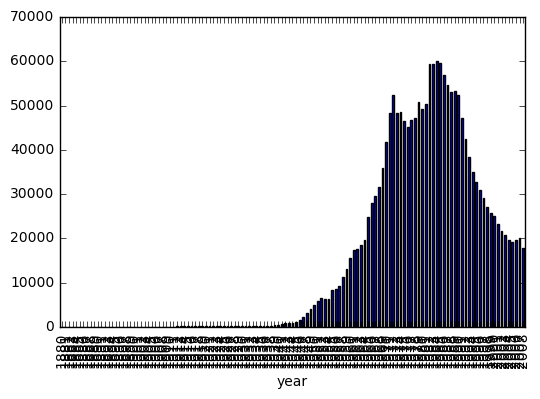

In [66]:
%matplotlib inline
# plt.figure(figsize=(8,4))
persons.ix[:, 'Christopher'].plot(kind='bar', rot=90)  # Select out all the people named Chris. Plot is kind of crowded. Matplotlib doesn't go more than 130 in x axis.

In [ ]:
persons.unstack('name')   # Create a data frame whose columns are each unique names, and the row indexes are the years.

In [ ]:
result = _   # underscore in ipython: the output of the last statement, because we don't want to compute again the same thing.

In [ ]:
result

In [ ]:
result['Wesley']

In [ ]:
result['Wesley'].plot()